In [56]:
import numpy as np
import ast
import pytz
import math
import itertools
from sklearn.preprocessing import LabelBinarizer
import pandas as pd
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer,HashingVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.feature_selection import r_regression 

df = pd.read_csv('top10K-spotify.csv',index_col=0)
df["type"].value_counts()
df=df.drop(columns=["index","city_1","district_1","district_2","city_3","district_3" ])
df = df[df['city_2'].notna()]
df = df[df['country'].notna()]
df.rename(columns = {'artist':'name'}, inplace = True)
# print(data_df.head())

df2=pd.read_csv('data_w_spotify.csv',index_col=None)
df2=df2.drop(columns=["isdone","id"])
df2['genres'] = df2['genres'].fillna('')

df3=df.merge(df2,on='name')


df3['genres']= df3['genres'].str.strip('[]').str.replace("'","").str.split('\s*,\s*')

def create_soup(x):
    return ' '.join(x['genres']) + ' '+ x['city_2'] + ' ' + x['country']+' ' + x['gender']+' ' + x['type']

df3['soup'] = df3.apply(create_soup, axis=1)
print(df3.shape,df3.columns)



# plt.imshow(cosine_sim,)
# plt.colorbar()
dict_names = dict(zip(df3.name, df3.spotifyid))


df = df.reset_index()
indices = pd.Series(df3.index, index=df3['name']).drop_duplicates()

count = HashingVectorizer()
count_matrix = count.fit_transform(df3['soup'])
# print(df3.head())
# data_table = pd.pivot_table(df,values='popularity',columns='soup',index='name')
# print(count_matrix.shape)
cosine_sim = cosine_similarity(count_matrix,)

pear=r_regression(count_matrix, pd.Series(df3.index, index=df3['name']))
# print(data_table.head())#data_table.corr()['Drake'].sort_values(ascending=False).iloc[:20])


def get_recommendations(df,name):
    df = pd.read_csv('top10K-spotify.csv',index_col=0)
    df["type"].value_counts()
    df=df.drop(columns=["index","city_1","district_1","district_2","city_3","district_3" ])
    df = df[df['city_2'].notna()]
    df = df[df['country'].notna()]
    df.rename(columns = {'artist':'name'}, inplace = True)
    # print(data_df.head())

    df2=pd.read_csv('data_w_spotify.csv',index_col=None)
    df2=df2.drop(columns=["isdone","id"])
    df2['genres'] = df2['genres'].fillna('')

    df3=df.merge(df2,on='name')


    df3['genres']= df3['genres'].str.strip('[]').str.replace("'","").str.split('\s*,\s*')

    def create_soup(x):
        return ' '.join(x['genres']) + ' '+ x['city_2'] + ' ' + x['country']+' ' + x['gender']+' ' + x['type']

    df3['soup'] = df3.apply(create_soup, axis=1)

    count = CountVectorizer()
    count_matrix = count.fit_transform(df3['soup'])
    # print(df3.head())
    print(count_matrix.shape)
    cosine_sim = cosine_similarity(count_matrix, count_matrix)
    dict_names = dict(zip(df3.name, df3.spotifyid))
    df3=df3.drop(columns=["spotifyid"])
    # Get the index of the movie that matches the title
    df3 = df3.reset_index()
    indices = pd.Series(df3.index, index=df3['name']).drop_duplicates()
    idx = indices[name]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]
    # print(sim_scores)
     # Get the movie indices
    indices = [i[0] for i in sim_scores]
    scores = [round(i[1]*100, 2) for i in sim_scores]

    # Return the top 10 most similar movies
     
    top_10=df3['name'].iloc[indices]
    spot_top10=[]
    for item in top_10:
        spot_top10.append(dict_names[str(item)])

    artist=dict_names[str(df3['name'].iloc[idx])]\
    
    wantedDict = {
        'mainId': artist,
        'top10': spot_top10,
        'scores': scores
    }

    return wantedDict





(1416, 11) Index(['name', 'gender', 'age', 'type', 'country', 'city_2', 'spotifyid',
       'genres', 'popularity', 'followers', 'soup'],
      dtype='object')


In [128]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier

# steps = [('svd', TruncatedSVD(20)), ('m', RandomForestClassifier())]
# model = Pipeline(steps=steps)
# n_scores = cross_val_score(model, count_matrix, indices, scoring='accuracy', n_jobs=-1, error_score='raise')
# print((np.mean(n_scores), np.std(n_scores)))
# print(n_scores) 

In [129]:
from sklearn.decomposition import TruncatedSVD
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import plotly.express as px
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(count_matrix,indices, test_size=0.4,random_state=42)


n_components = 150

pca2 = TruncatedSVD(n_components=n_components)
pca2.fit_transform(train_X)

exp_var_cumul = np.cumsum(pca2.explained_variance_ratio_)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"},
    width=900, height=650,
)

([], [])

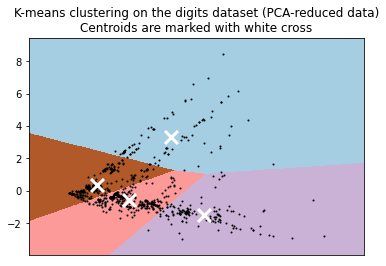

In [64]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=100, n_init=1, verbose=False)
kmeans.fit(components)

h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = components[:, 0].min() - 1, components[:, 0].max() + 1
y_min, y_max = components[:, 1].min() - 1, components[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(components[:, 0], components[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())

(567,) (567,)
Pearsons correlation: 0.056


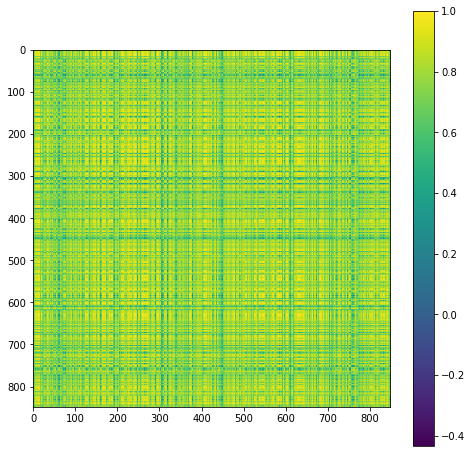

In [154]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from scipy.stats import pearsonr
from sklearn.metrics import confusion_matrix, accuracy_score

import plotly.graph_objects as go
n_components = 2

pca = TruncatedSVD(n_components=n_components)

def plot_2d(component1, component2):
    
    fig = go.Figure(data=go.Scatter(
        x = component1,
        y = component2,
        mode='markers',
        marker=dict(
            size=10,
            color=train_y, #set color equal to a variable
            showscale=True,
            line_width=1
        )
    ))
    fig.update_layout(margin=dict( l=100,r=100,b=100,t=100),width=1200,height=700)                 
    
    fig.show()

def plot_3d(component1,component2,component3):
    fig = go.Figure(data=[go.Scatter3d(
        x=component1,
        y=component2,
        z=component3,
        mode='markers',
        marker=dict(
            size=10,
            color=train_y,               
            opacity=1,
            line_width=1
        )
    )])
    fig.update_layout(width=1200,height=800)
    
    fig.show()


train_X = pca.fit_transform(train_X)
test_X = pca.transform(test_X)

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(train_X, train_y)
y_pred = classifier.predict(test_X)

print(y_pred.shape,test_y.shape)
cosine_sim = cosine_similarity(train_X, train_X)

plt.imshow(cosine_sim,)
plt.colorbar()
cm = confusion_matrix(test_y, y_pred)
corr, _ = pearsonr(test_y, y_pred)
print('Pearsons correlation: %.3f' % corr)
accuracy_score(test_y,y_pred)


plot_2d(train_X[:, 0],train_X[:, 1])


In [151]:
train_X, test_X, train_y, test_y = train_test_split(count_matrix,indices, test_size=0.4,random_state=42)

n_components = 100

pca = TruncatedSVD(n_components=n_components)
components2 = pca.fit_transform(train_X)
plot_3d(components2[:, 0],components2[:, 1],components2[:, 2])

train_X = pca.fit_transform(train_X)
test_X = pca.transform(test_X)

classifier = LogisticRegression(random_state = 0)
classifier.fit(train_X, train_y)
y_pred = classifier.predict(test_X)

print(y_pred.shape,test_y.shape)


corr, _ = pearsonr(test_y, y_pred)
print('Pearsons correlation: %.3f' % corr)
accuracy_score(test_y,y_pred)

(567,) (567,)
Pearsons correlation: 0.345


C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



0.0

In [ ]:
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2,perplexity=50,learning_rate=1000).fit_transform(train_X)
plot_2d(X_embedded[:, 0],X_embedded[:, 1])

C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.



In [ ]:
X_embedded = TSNE(n_components=3,perplexity=50,learning_rate=2000).fit_transform(train_X)
plot_3d(X_embedded[:, 0],X_embedded[:, 1],X_embedded[:, 2])

In [ ]:
from sklearn.decomposition import TruncatedSVD
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomTreesEmbedding
from sklearn.manifold import (
    Isomap,
    LocallyLinearEmbedding,
    MDS,
    SpectralEmbedding,
    TSNE,
)
from sklearn.neighbors import NeighborhoodComponentsAnalysis
from sklearn.pipeline import make_pipeline
from sklearn.random_projection import SparseRandomProjection

n_samples, n_features = train_X.shape
n_neighbors = 30

embeddings = {
    "Random projection embedding": SparseRandomProjection(
        n_components=2, random_state=42
    ),
    "Truncated SVD embedding": TruncatedSVD(n_components=2),
    "Isomap embedding": Isomap(n_neighbors=n_neighbors, n_components=2),
    "Standard LLE embedding": LocallyLinearEmbedding(
        n_neighbors=n_neighbors, n_components=2, method="standard"
    ),
    "Modified LLE embedding": LocallyLinearEmbedding(
        n_neighbors=n_neighbors, n_components=2, method="modified"
    ),
    "Hessian LLE embedding": LocallyLinearEmbedding(
        n_neighbors=n_neighbors, n_components=2, method="hessian"
    ),
    "LTSA LLE embedding": LocallyLinearEmbedding(
        n_neighbors=n_neighbors, n_components=2, method="ltsa"
    ),
    "MDS embedding": MDS(
        n_components=2, n_init=1, max_iter=120, n_jobs=2
    ),
    "Random Trees embedding": make_pipeline(
        RandomTreesEmbedding(n_estimators=200, max_depth=5, random_state=0),
        TruncatedSVD(n_components=2),
    ),
    "Spectral embedding": SpectralEmbedding(
        n_components=2, random_state=0, eigen_solver="arpack"
    ),
    "t-SNE embeedding": TSNE(
        n_components=2,
        n_iter=500,
        n_iter_without_progress=150,
        n_jobs=2,
        random_state=0,
    ),
    "NCA embedding": NeighborhoodComponentsAnalysis(
        n_components=2, init="pca", random_state=0
    ),
}

In [ ]:
from time import time

projections, timing = {}, {}
for name, transformer in embeddings.items():
    if name.startswith("Linear Discriminant Analysis"):
        data = train_X.todense()
    else:
        data = train_X

    print(f"Computing {name}...")
    start_time = time()
    projections[name] = transformer.fit_transform(data, train_y)
    timing[name] = time() - start_time

Computing Random projection embedding...
Computing Truncated SVD embedding...
Computing Linear Discriminant Analysis embedding...


C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:727: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



ValueError: The number of samples must be more than the number of classes.

In [ ]:
# make a synthetic dataset
from sklearn.ensemble import RandomTreesEmbedding
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import ExtraTreeClassifier

# use RandomTreesEmbedding to transform data
hasher = RandomTreesEmbedding(n_estimators=10, random_state=0, max_depth=3)
X_transformed = hasher.fit_transform(count_matrix)

# Visualize result after dimensionality reduction using truncated SVD
svd = TruncatedSVD(n_components=2)
X_reduced = svd.fit_transform(X_transformed)

# Learn a Naive Bayes classifier on the transformed data
nb = BernoulliNB()
nb.fit(X_transformed, indices)


# Learn an ExtraTreesClassifier for comparison
trees = ExtraTreeClassifier(max_depth=3, random_state=0)
trees.fit(count_matrix, indices)

ExtraTreeClassifier(max_depth=3, random_state=0)

In [ ]:
import plotly.graph_objs as go
from plotly import subplots

fig = subplots.make_subplots(rows=1, cols=2,
                          subplot_titles=("Original Data (2d)",
                                         "Truncated SVD reduction (2d)<br>of transformed data (%dd)" %
                                          X_transformed.shape[1])
                         )

original = go.Scatter(x=count_matrix.todense()[:, 0], y=count_matrix.todense()[:, 1], 
                      mode='markers',
                      showlegend=False,                      
                      marker=dict(color=indices,
                                  colorscale='Viridis'),
                     )
fig.append_trace(original, 1, 1)

reduced = go.Scatter(x=X_reduced[:, 0], y=X_reduced[:, 1], 
                     mode='markers',
                     showlegend=False,
                     marker=dict(color=indices, 
                                 colorscale='Viridis')
                     )
fig.append_trace(reduced, 1, 2)


In [ ]:
fig

TypeError: can only join an iterable

In [ ]:
import numpy as np
X = np.array([[1, 1], [2, 1], [3, 1.2], [4, 1], [5, 0.8], [6, 1]])
from sklearn.decomposition import NMF
model = NMF(n_components=2, init='random', random_state=0)
W = model.fit_transform(X)
H = model.components_

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier, SGDRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import random
import itertools
from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Lambda
from keras.preprocessing.text import Tokenizer
from collections import defaultdict
from keras.layers.convolutional import Convolution1D
from keras import backend as K
from keras import layers,models
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
plt.style.use('ggplot')

indices = pd.Series(df3.index, index=df3['name']).drop_duplicates()
# print(indices)

count = CountVectorizer()
vectorizer = count.fit(df3['soup'])
print(len(df3["soup"]))
dftest=df3["soup"]

train_features = count.transform(train_X)
test_features = count.transform(test_X)
print(test_y.shape)
# print(df3.head())
# df3=df3.drop(columns=["spotifyid"])

# fselect = SelectKBest(chi2)
# train_features = fselect.fit_transform(train_features, indices)
# test_features = fselect.transform(test_features)

cv_results = cross_validate(LogisticRegression(), train_X, train_y, cv=2)
cv_results['test_score'].mean()

# model1 = MultinomialNB()
# model1.fit( train_features, train_y )

# model2 = OneVsRestClassifier(SVC(kernel='linear'))
# model2.fit( train_features, train_y )

# model3 = RandomForestClassifier()
# model3.fit( train_features, train_y )

# # model4 = GradientBoostingClassifier()
# # model4.fit( train_features, indices )

# pred_1 = model1.predict( test_features.toarray() )
# print(pred_1[0:10],test_y[0:10])
# print('prediction 1 accuracy: ', accuracy_score(test_y, pred_1))
# pred_2 = model2.predict( test_features.toarray() )
# print('prediction 2 accuracy: ', accuracy_score(test_y, pred_2))
# pred_3 = model3.predict( test_features.toarray() )
# print('prediction 3 accuracy: ', accuracy_score(test_y, pred_3))
# # pred_4 = model4.predict( test_features.toarray() )
# print('prediction 4 accuracy: ', accuracy_score(indices, pred_4))


1416
(567,)


ValueError: n_splits=2 cannot be greater than the number of members in each class.

In [ ]:
from gensim.models  import Word2Vec
w2v_model = Word2Vec(min_count=1, workers=5, window =3, sg = 1)

def create_soup(x):
    return ','.join(x['genres']) + ','+ x['city_2'] + ',' + x['country']+',' + x['gender']+',' + x['type'] +','+ x['name']

df3['soup2'] = df3.apply(create_soup, axis=1)
sent = [row.split(',') for row in df3['soup2']]
# tagged_data = [TaggedDocument(d, [df3.at[i,'name']]) for i, d in enumerate(sent)]
w2v_model.build_vocab(sent, progress_per=10000)
# model = Doc2Vec(tagged_data, vector_size = 3, window = 2, min_count = 1, epochs = 100)

w2v_model.train(sent, total_examples=w2v_model.corpus_count, epochs=1000, report_delay=1)

(8534226, 12477000)

In [ ]:

# test_doc_vector = model.infer_vector(["Katy Perry","Katy Perry"])
# model.docvecs.most_similar(positive = [test_doc_vector])

In [ ]:
w2v_model.init_sims(replace=True)


C:\Users\David\AppData\Local\Temp\ipykernel_5392\2897808894.py:1: DeprecationWarning: Call to deprecated `init_sims` (Gensim 4.0.0 implemented internal optimizations that make calls to init_sims() unnecessary. init_sims() is now obsoleted and will be completely removed in future versions. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
  w2v_model.init_sims(replace=True)


In [ ]:
w2v_model.wv.most_similar(positive=["Drake"],topn=20)


[('Shawn Mendes', 0.896814227104187),
 ('JP Saxe', 0.8553229570388794),
 ('Tory Lanez', 0.849699854850769),
 ('The Weeknd', 0.8261634111404419),
 ('Shawn Hook', 0.8177680969238281),
 ('Jessie Reyez', 0.8168878555297852),
 ('toronto rap', 0.8146144151687622),
 ('PARTYNEXTDOOR', 0.8056178092956543),
 ('Nelson', 0.798721194267273),
 ('"punk n roll"', 0.7968653440475464),
 ('Mississauga', 0.7959104776382446),
 ('Michael Bublé', 0.7938754558563232),
 ('Danko Jones', 0.7816400527954102),
 ('Kai', 0.7807080149650574),
 ('Murda Beatz', 0.7806839942932129),
 ('Powfu', 0.7805842161178589),
 ('Scarborough', 0.775161623954773),
 ('dvsn', 0.7725071907043457),
 ('Burnaby', 0.7719690799713135),
 ('Majid Jordan', 0.7668370604515076)]

Tensorflow/Keras: 2.11.0
numpy: 1.22.4
matplotlib: 3.5.1
seaborn: 0.12.1
Model: "Autoencoder-Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 AE-Input-Layer (InputLayer)  [(None, 1373)]           0         
                                                                 
 AE-Encoder-Hidden-Layer (De  (None, 512)              703488    
 nse)                                                            
                                                                 
 AE-Bottleneck-Layer (Dense)  (None, 256)              131328    
                                                                 
 AE-Decoder-Hidden-Layer (De  (None, 128)              32896     
 nse)                                                            
                                                                 
 AE-Output-Layer (Dense)     (None, 1373)              177117    
                                          

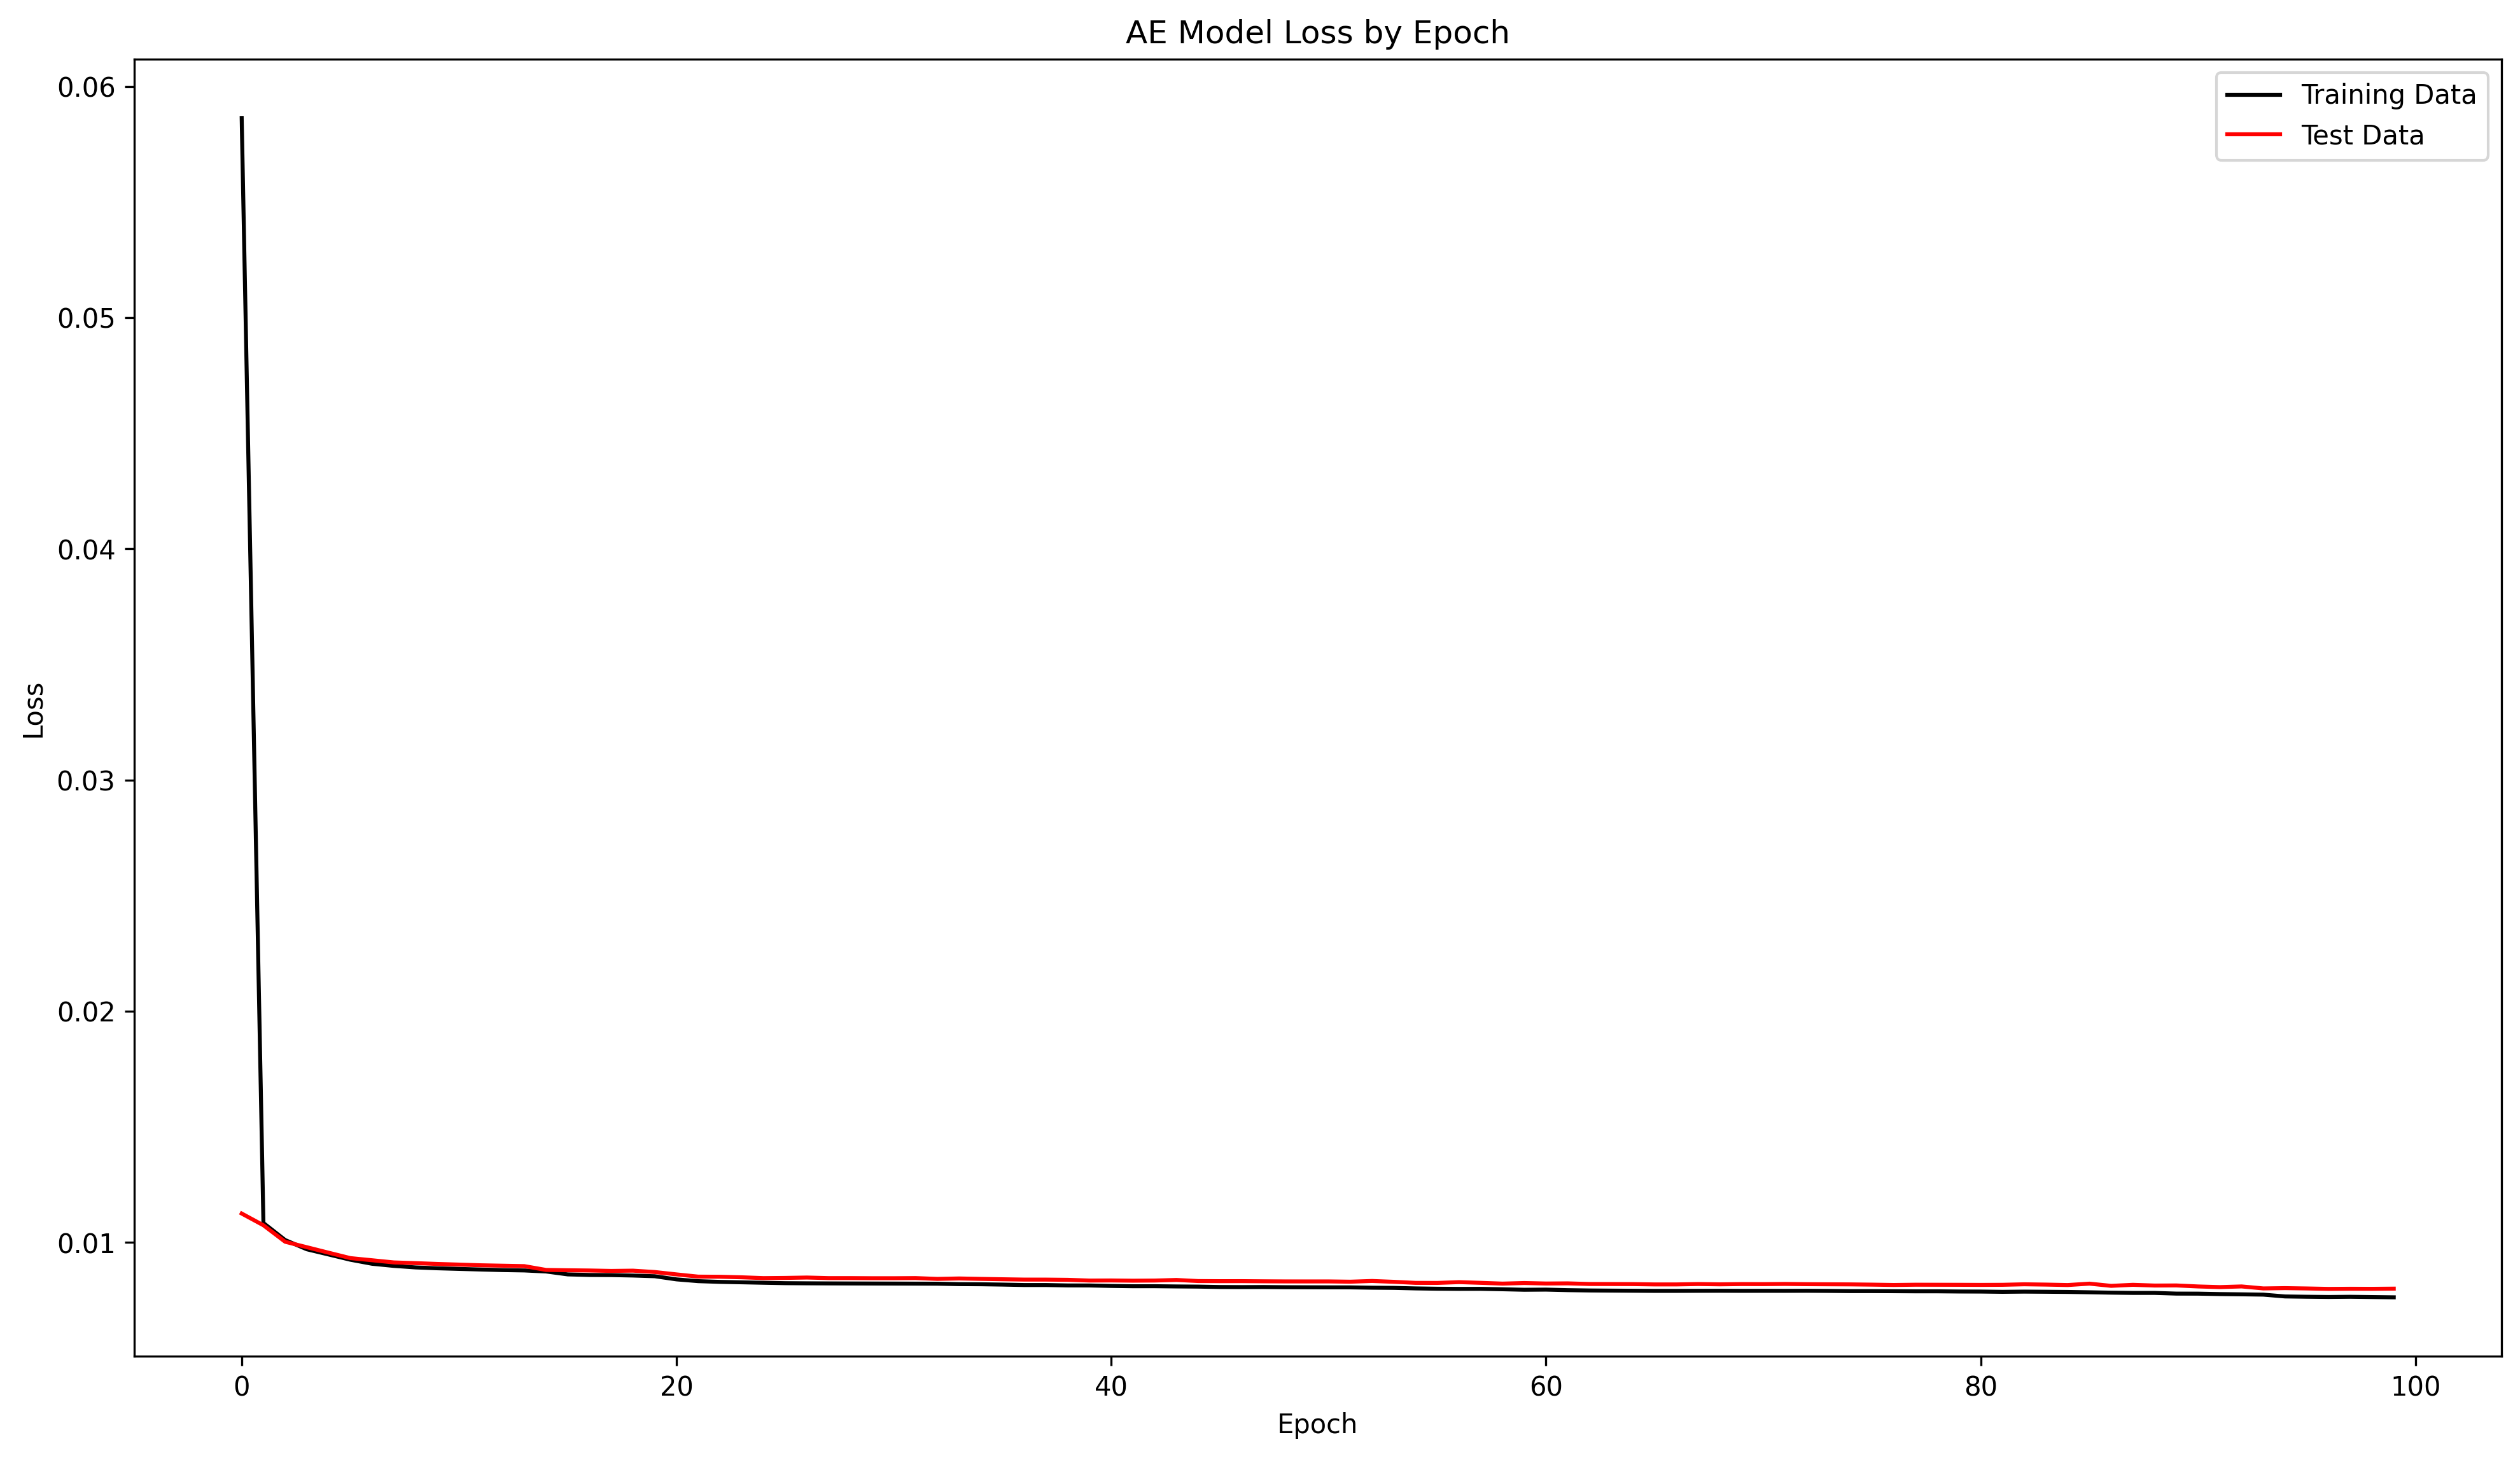

In [ ]:
# Tensorflow / Keras
from tensorflow import keras # for building Neural Networks
print('Tensorflow/Keras: %s' % keras.__version__) # print version
from keras import Input # for instantiating a keras tensor
from keras.layers import Dense # for adding Dense layers to AE model
from keras.models import Model # for creating a Neural Network Autoencoder model
from sklearn.model_selection import train_test_split


# Data manipulation
import numpy as np # for data manipulation
print('numpy: %s' % np.__version__) # print version


# Visualization
import matplotlib 
import matplotlib.pyplot as plt # for plotting model loss
print('matplotlib: %s' % matplotlib.__version__) # print version
import seaborn as sns # for plotting neuron heatmap
print('seaborn: %s' % sns.__version__) # print version


# Other utilities
import sys
import os
count = CountVectorizer()
X = count.fit_transform(df3['soup'])

X_train, X_test, y_train, y_test = train_test_split(X.toarray(), indices, test_size=0.33, random_state=42)
#----------- Build AE Model ----------#

# Shapes
AE_n_inputs=X_train.shape[1] #--- No. of neurons for the input and output layers
AE_n_hidden=16 #--- No. of neurons for the hidden layers (including bottleneck)

# Layers
AE_visible = Input(shape=(AE_n_inputs,), name='AE-Input-Layer') #--- Input-Layer 
AE_enc_hidden = Dense(units=512, activation='relu', name='AE-Encoder-Hidden-Layer')(AE_visible) #--- Encoder-Hidden-Layer 
AE_bottleneck = Dense(units=256, activation='relu', name='AE-Bottleneck-Layer')(AE_enc_hidden) #--- Bottleneck-Layer
AE_dec_hidden = Dense(units=128, activation='relu', name='AE-Decoder-Hidden-Layer')(AE_bottleneck) #--- Decoder-Hidden-Layer 
AE_output = Dense(units=AE_n_inputs, activation='sigmoid', name='AE-Output-Layer')(AE_dec_hidden) #--- Output-Layer

# Define autoencoder model
AE_model = Model(inputs=AE_visible, outputs=AE_output, name='Autoencoder-Model')

# Compile autoencoder model
AE_model.compile(optimizer='adam', loss='mse')

# Print model summary
print(AE_model.summary())


# Fit the autoencoder model to reconstruct input
AE_history = AE_model.fit(X_train, X_train, epochs=100, batch_size=16, verbose=1, validation_data=(X_test, X_test))


#---------- Plot a loss chart ----------#
fig, ax = plt.subplots(figsize=(16,9), dpi=300)
plt.title(label='AE Model Loss by Epoch', loc='center')
ax.plot(AE_history.history['loss'], label='Training Data', color='black')
ax.plot(AE_history.history['val_loss'], label='Test Data', color='red')
ax.set(xlabel='Epoch', ylabel='Loss')
plt.legend()
plt.show()


#----------- Save AE Encoder Model ----------#

# Define an encoder model without the decoder
AE_encoder = Model(inputs=AE_visible, outputs=AE_bottleneck)

# Compile encoder model
AE_encoder.compile(optimizer='adam', loss='mse')

In [ ]:
%pip install scikit-suprise
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import cross_validate

# Load the movielens-100k dataset (download it if needed).
data = Dataset.load_builtin('ml-100k')

# Use the famous SVD algorithm.
algo = SVD()

# Run 5-fold cross-validation and print results.
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement scikit-suprise (from versions: none)
ERROR: No matching distribution found for scikit-suprise
You should consider upgrading via the 'C:\Users\David\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


ModuleNotFoundError: No module named 'surprise'

In [ ]:

# # X_train = train_features.toarray()
# # X_test = test_features.toarray()

# split = int(0.8*dtf_users.shape[1])
# dtf_train = dtf_users.loc[:, :split-1]
# dtf_test = dtf_users.loc[:, split:]
# embeddings_size = 50

# prd = train_features.shape[1]
# # Input layer
# xusers_in = layers.Input(name="xusers_in", shape=(1,))
# xproducts_in = layers.Input(name="xproducts_in", shape=(1,))

# # A) Matrix Factorization
# ## embeddings and reshape
# cf_xproducts_emb = layers.Embedding(name="cf_xproducts_emb", input_dim=prd, output_dim=embeddings_size)(xproducts_in)
# cf_xproducts = layers.Reshape(name='cf_xproducts', target_shape=(embeddings_size,))(cf_xproducts_emb)
# ## product

# # B) Neural Network
# ## embeddings and reshape
# ## embeddings and reshape
# nn_xproducts_emb = layers.Embedding(name="nn_xproducts_emb", input_dim=prd, output_dim=embeddings_size)(xproducts_in)
# nn_xproducts = layers.Reshape(name='nn_xproducts', target_shape=(embeddings_size,))(nn_xproducts_emb)
# ## concat and dense
# nn_xx = layers.Concatenate()([nn_xproducts])
# nn_xx = layers.Dense(name="nn_xx", units=int(embeddings_size/2), activation='relu')(nn_xx)

# # Merge A & B
# y_out = layers.Dense(name="y_out", units=1, activation='linear')(y_out)
# # Compile
# model = models.Model(inputs=[xusers_in,xproducts_in], outputs=y_out, name="Neural_CollaborativeFiltering")
# model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_absolute_percentage_error'])

# print("Training...")
# model.fit(X_train, Y_train, batch_size=16, validation_split=0.1)
# print(X_test.shape, y_test.shape,X_train.shape, Y_train.shape)
# score, acc = model.evaluate(X_test, y_test,verbose=2, batch_size= 256)
# print('test accuracy:', acc)

# # print("--- user", i, "---")
# top = 5
# y_test = test.sort_values("y", ascending=False)["product"].values[:top]
# print("y_test:", y_test)
# predicted = test.sort_values("yhat", ascending=False)["product"].values[:top]
# print("predicted:", predicted)
# true_positive = len(list(set(y_test) & set(predicted)))
# print("true positive:", true_positive, "("+str(round(true_positive/top*100,1))+"%)")
# print("accuracy:", str(round(metrics.accuracy_score(y_test,predicted)*100,1))+"%")
# print("mrr:", mean_reciprocal_rank(y_test, predicted))


X_train shape: (1416, 10)
X_test shape: (1416, 10) 1416
Training...
80/80 [==============================] - 1s 14ms/step - loss: 8.8490 - val_loss: 9.1459
(1416, 10) (1416,) (1416, 10) (1416, 1416)


ValueError: in user code:

    File "C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\engine\training.py", line 1820, in test_function  *
        return step_function(self, iterator)
    File "C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\engine\training.py", line 1804, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\engine\training.py", line 1792, in run_step  **
        outputs = model.test_step(data)
    File "C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\engine\training.py", line 1758, in test_step
        self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\engine\training.py", line 1082, in compute_loss
        return self.compiled_loss(
    File "C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\losses.py", line 284, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\losses.py", line 2004, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\backend.py", line 5532, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 1416) are incompatible


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(count_matrix, df3.name, test_size=0.33, random_state=42)
from keras.models import Model
from keras.layers import Input, Dense, Dropout, Flatten
from keras.layers.convolutional import Convolution1D, MaxPooling1D
maxlen = 1024 # In the original paper for character level convolutions, Zhang et al. used
# a maxlen of 1014. Just using 1024, because for the sake of consitency, of comparison
# with the next model. Also, the number 1014 kinda bothered me. 1024 makes me feel a lot better.
nb_filter = 256
dense_outputs = 1024
filter_kernels = [7, 7, 3, 3, 3, 3]
n_out = 2
batch_size = 80
nb_epoch = 10

inputs = Input(shape=(maxlen, vocab_size), name='input', dtype='float32')
conv = Convolution1D(nb_filter=nb_filter, filter_length=filter_kernels[0],
                     border_mode='valid', activation='relu',
                     input_shape=(maxlen, vocab_size))(inputs)
conv = MaxPooling1D(pool_length=3)(conv)
conv1 = Convolution1D(nb_filter=nb_filter, filter_length=filter_kernels[1],
                      border_mode='valid', activation='relu')(conv)
conv1 = MaxPooling1D(pool_length=3)(conv1)
conv2 = Convolution1D(nb_filter=nb_filter, filter_length=filter_kernels[2],
                      border_mode='valid', activation='relu')(conv1)
conv3 = Convolution1D(nb_filter=nb_filter, filter_length=filter_kernels[3],
                      border_mode='valid', activation='relu')(conv2)
conv4 = Convolution1D(nb_filter=nb_filter, filter_length=filter_kernels[4],
                      border_mode='valid', activation='relu')(conv3)
conv5 = Convolution1D(nb_filter=nb_filter, filter_length=filter_kernels[5],
                      border_mode='valid', activation='relu')(conv4)
conv5 = MaxPooling1D(pool_length=3)(conv5)
conv5 = Flatten()(conv5)
z = Dropout(0.5)(Dense(dense_outputs, activation='relu')(conv5))
z = Dropout(0.5)(Dense(dense_outputs, activation='relu')(z))

pred = Dense(n_out, activation='softmax', name='output')(z)   
model = Model(input=inputs, output=pred) 
model.compile(loss='categorical_crossentropy', optimizer='rmsprop',
              metrics=['accuracy'])
# X_train = train_features.toarray()
# X_test = test_features.toarray()

# print('X_train shape:', X_train.shape)
# print('X_test shape:', X_test.shape)
# y_train = np.array(train['Rating']-1)
# y_test = np.array(test['Rating']-1)

# Y_train = np_utils.to_categorical(y_train, nb_classes)
# Y_test = np_utils.to_categorical(y_test, nb_classes)


# # pre-processing: divide by max and substract mean
# scale = np.max(X_train)
# X_train /= scale
# X_test /= scale

# mean = np.mean(X_train)
# X_train -= mean
# X_test -= mean

# input_dim = X_train.shape[1]

# # Here's a Deep Dumb MLP (DDMLP)
# model = Sequential()
# model.add(Dense(256, input_dim=input_dim))
# model.add(Activation('relu'))
# model.add(Dropout(0.4))
# model.add(Dense(128))
# model.add(Activation('relu'))
# model.add(Dropout(0.2))
# model.add(Dense(nb_classes))
# model.add(Activation('softmax'))

# # we'll use categorical xent for the loss, and RMSprop as the optimizer
# model.compile(loss='categorical_crossentropy', optimizer='rmsprop')

# print("Training...")
# model.fit(X_train, Y_train, nb_epoch=5, batch_size=16, validation_split=0.1, show_accuracy=True)

# print("Generating test predictions...")
# preds = model.predict_classes(X_test, verbose=0)
# X_train shape: (14587, 1000)
# X_test shape: (6252, 1000)
# Training...

In [ ]:
# data_df['gender'] = data_df['gender'].astype('str') 
# X = data_df.drop(columns=['gender'])

# lb = LabelBinarizer()
# y=lb.fit_transform(data_df['gender'])
# print("Training Model...")

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

# model = DecisionTreeClassifier()

# model.fit(X_train, y_train)

# parameters = {'max_depth':range(3,20)}
# clf = GridSearchCV(DecisionTreeClassifier(), parameters, n_jobs=4)
# clf.fit(X=X, y=y)
# tree_model = clf.best_estimator_
# print (clf.best_score_, clf.best_params_) 

# y_train_pred = model.predict(X_train)
# y_test_pred = model.predict(X_test)

# print(f"Train MAE: {accuracy_score(y_train_pred, y_train)}")
# print(f"Test MAE: {accuracy_score(y_test_pred, y_test)}")


Training Model...
Train MAE: 0.9777097902097902
Test MAE: 0.7447552447552448


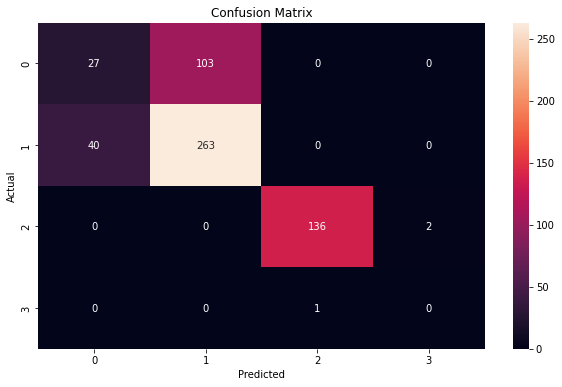

In [ ]:
import numpy as np
import ast
import pytz
import math
import itertools
from sklearn.preprocessing import LabelBinarizer
import pandas as pd
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,accuracy_score,confusion_matrix
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

df = pd.read_csv('top10K-spotify.csv',index_col=0)
df["type"].value_counts()
df=df.drop(columns=['artist',"index","city_1","district_1","district_2","city_3","district_3" ])
# print(df.head(),df.shape)
df = df[df['city_2'].notna()]
df = df[df['country'].notna()]
data_df = pd.get_dummies(df,columns=['type','country','city_2'],drop_first=True)
# print(data_df.dtypes)

data_df['gender'] = data_df['gender'].astype('str') 
X = data_df.drop(columns=['gender'])

lb = LabelBinarizer()
y=lb.fit_transform(data_df['gender'])
print("Training Model...")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

model = DecisionTreeClassifier()

model.fit(X_train, y_train)

# parameters = {'max_depth':range(3,20)}
# clf = GridSearchCV(DecisionTreeClassifier(), parameters, n_jobs=4)
# clf.fit(X=X, y=y)
# tree_model = clf.best_estimator_
# print (clf.best_score_, clf.best_params_) 

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print(f"Train MAE: {accuracy_score(y_train_pred, y_train)}")
print(f"Test MAE: {accuracy_score(y_test_pred, y_test)}")

cm = confusion_matrix(y_test.argmax(axis=1),y_test_pred.argmax(axis=1) )
plt.subplots(figsize=(10, 6))
sb.heatmap(cm, annot = True, fmt = 'g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
import numpy as np
import ast
import pytz
import math
import itertools
from sklearn.preprocessing import LabelBinarizer
import pandas as pd
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,accuracy_score,hamming_loss,confusion_matrix
from sklearn.model_selection import GridSearchCV
import seaborn as sb
import matplotlib.pyplot as plt

df = pd.read_csv('top10K-spotify.csv',index_col=0)
df["type"].value_counts()
df=df.drop(columns=["index","city_1","district_1","district_2","city_3","district_3" ])
# print(df.head(),df.shape)
df = df[df['city_2'].notna()]
df = df[df['country'].notna()]
data_df = pd.get_dummies(df,columns=['gender','type','country','city_2'],drop_first=True)
# print(data_df.dtypes)

# data_df['gender'] = data_df['gender'].astype('str') 
X = data_df.drop(columns=['artist'])

lb = LabelBinarizer(sparse_output=True)
y=lb.fit_transform(data_df['artist'])
print("Training Model...")

X_train, X_test, y_train, y_test = train_test_split(X, y.todense(), test_size=0.35, random_state=42)

model = DecisionTreeClassifier()

model.fit(X_train, y_train)

# parameters = {'max_depth':range(3,20)}
# clf = GridSearchCV(DecisionTreeClassifier(), parameters, n_jobs=4)
# clf.fit(X=X, y=y.todense())
# tree_model = clf.best_estimator_
# print (clf.best_score_, clf.best_params_) 

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print(f"Train MAE: {accuracy_score(y_train_pred, y_train)}")
print(f"Test MAE: {accuracy_score(y_test_pred, y_test)}")



Training Model...


C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


Train MAE: 0.884884346422808
Test MAE: 0.023976023976023976


In [ ]:
import numpy as np
import ast
import pytz
import math
import itertools
from sklearn.preprocessing import LabelBinarizer
import pandas as pd
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,accuracy_score,hamming_loss,confusion_matrix
from sklearn.model_selection import GridSearchCV
import seaborn as sb
import matplotlib.pyplot as plt

df = pd.read_csv('top10K-spotify.csv',index_col=0)
df["type"].value_counts()
df=df.drop(columns=["artist","index","city_1","district_1","district_2","city_3","district_3" ])
# print(df.head(),df.shape)
df = df[df['city_2'].notna()]
df = df[df['country'].notna()]
data_df = pd.get_dummies(df,columns=['gender','type','country'],drop_first=True)
# print(data_df.dtypes)

# data_df['gender'] = data_df['gender'].astype('str') 
X = data_df.drop(columns=['city_2'])

lb = LabelBinarizer(sparse_output=True)
y=lb.fit_transform(data_df['city_2'])
print("Training Model...")

X_train, X_test, y_train, y_test = train_test_split(X, y.todense(), test_size=0.30, random_state=42)

model = DecisionTreeClassifier()

model.fit(X_train, y_train)

# parameters = {'max_depth':range(3,20)}
# clf = GridSearchCV(DecisionTreeClassifier(), parameters, n_jobs=4)
# clf.fit(X=X, y=y.todense())
# tree_model = clf.best_estimator_
# print (clf.best_score_, clf.best_params_) 



Training Model...


C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


Train MAE: 0.5144855144855145
Test MAE: 0.13986013986013987


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier()

model3.fit(X_train, y_train)

# parameters = {'max_depth':range(3,20)}
# clf = GridSearchCV(DecisionTreeClassifier(), parameters, n_jobs=4)
# clf.fit(X=X, y=y.todense())
# tree_model = clf.best_estimator_
# print (clf.best_score_, clf.best_params_) 

y_train_pred = model3.predict(X_train)
y_test_pred = model3.predict(X_test)

print(f"2Train MAE: {accuracy_score(y_train_pred, y_train)}")
print(f"2Test MAE: {accuracy_score(y_test_pred, y_test)}")

C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


2Train MAE: 0.5334665334665335
2Test MAE: 0.13986013986013987


In [ ]:
# # For chapter 5
# from sklearn.linear_model import SGDClassifier
# import matplotlib.pyplot as plt
# import time

# # For chapter 6
# from sklearn.metrics import accuracy_score
# from sklearn.model_selection import GridSearchCV

# clf = SGDClassifier(loss="log", penalty="l2")
# clf.fit(X_train, y_train)
# y_pred = clf.predict(X_test)

# print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))

C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


ValueError: y should be a 1d array, got an array of shape (1716, 2812) instead.

Training Model...
Train MAE: 1.0
Test MAE: 0.9947552447552448


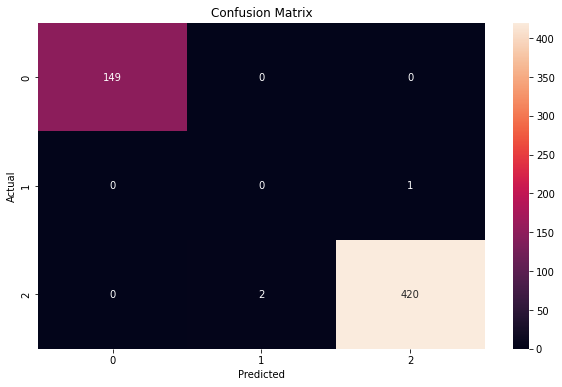

In [ ]:
import numpy as np
import ast
import pytz
import math
import itertools
from sklearn.preprocessing import LabelBinarizer
import pandas as pd
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,accuracy_score,confusion_matrix
from sklearn.model_selection import GridSearchCV
import seaborn as sb
import matplotlib.pyplot as plt

df = pd.read_csv('top10K-spotify.csv',index_col=0)
df["type"].value_counts()
df=df.drop(columns=['artist',"index","city_1","district_1","district_2","city_3","district_3" ])
# print(df.head(),df.shape)
df = df[df['city_2'].notna()]
df = df[df['country'].notna()]
data_df = pd.get_dummies(df,columns=['gender','country','city_2'],drop_first=True)
# print(data_df.dtypes)

data_df['type'] = data_df['type'].astype('str') 
X = data_df.drop(columns=['type'])

lb = LabelBinarizer()
y=lb.fit_transform(data_df['type'])
print("Training Model...")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

model = DecisionTreeClassifier()

model.fit(X_train, y_train)

# parameters = {'max_depth':range(3,20)}
# clf = GridSearchCV(DecisionTreeClassifier(), parameters, n_jobs=4)
# clf.fit(X=X, y=y)
# tree_model = clf.best_estimator_
# print (clf.best_score_, clf.best_params_) 

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


print(f"Train MAE: {accuracy_score(y_train_pred, y_train)}")
print(f"Test MAE: {accuracy_score(y_test_pred, y_test)}")

cm = confusion_matrix(y_test.argmax(axis=1),y_test_pred.argmax(axis=1) )
plt.subplots(figsize=(10, 6))
sb.heatmap(cm, annot = True, fmt = 'g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
df1=nodes.append(df, ignore_index=True)

MemoryError: Unable to allocate 1.20 GiB for an array with shape (3579, 45034) and data type float64